# Data_Cleaning_EDA_II
From our first analysis we concluded that the data was insufficient to identify what the client was looking for so we contacted the client for more information. After communicating our findings, the client gave a list of codenames for the dataset and became more specific about the targeting platforms. They are interested in launching a new game title to three specific platforms: PC, Playstation and Xbox.<br>

We will continue our analysis from the cleaned csv file from previous time.
<br><br>



For this round we combine the new information and answer the following questions:<br><br>

1. How many titles were released per year for each platform? (Tip: it makes sense to study the most recent platform versions that we have enough data for Main Game categories)<br>
2. Do game ratings vary from year to year for each of these platforms? And how?<br>
3. Which perspective is the most common for games that are published to all three platforms?

In [1]:
# Import Pandas and Numpy and datetime libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from datetime import datetime

 ## Appropriate dictionaries
Twitch has some codenames for the categories, genres, themes and perspectives. The dictionaries bellow will be used to replace these codename with real names

In [147]:
genres = {
    2:"Point-and-click",
    4:"Fighting",
    5:"Shooter",
    7:"Music",
    8:"Platform",
    9:"Puzzle",
    10:"Racing",
    11:"Real Time Strategy (RTS)",
    12:"Role-playing (RPG)",
    13:"Simulator",
    14:"Sport",
    15:"Strategy",
    16:"Turn-based strategy (TBS)",
    24:"Tactical",
    26:"Quiz/Trivia",
    25:"Hack and slash/Beat 'em up",
    30:"Pinball",
    31:"Adventure",
    33:"Arcade",
    34:"Visual Novel",
    32:"Indie",
    35:"Card & Board Game",
    36:"MOBA"
}

themes = {
    17:"Fantasy",
    20:"Thriller",
    18:"Science fiction",
    1 :"Action",
    19:"Horror",
    21:"Survival",
    22:"Historical",
    23:"Stealth",
    28:"Business",
    27:"Comedy",
    31:"Drama",
    32:"Non-fiction",
    34:"Educational",
    33:"Sandbox",
    35:"Kids",
    38:"Open world",
    39:"Warfare",
    41:"4X (explore, expand, exploit, and exterminate)",
    42:"Erotic",
    43:"Mystery",
    40:"Party",
    44:"Romance"  
}

perspectives = {
    1:"First person",
    2:"Third person",
    3:"Bird view",
    4:"Side view",
    5:"Text",
    6:"Auditory",
    7:"Virtual Reality"
}

platforms = {
0 : 'missing',  
1 : 'missing',
2 : 'missing',
3 : 'Linux',
4 : 'Nintendo 64',
5 : 'Wii',
6 : 'PC',
7 : 'PlayStation',
8 : 'PlayStation 2',
9 : 'PlayStation 3',
11 : 'Xbox',
12 : 'Xbox 360',
13 : 'PC DOS',
14 : 'Mac',
15 : 'Commodore C64/128',
16 : 'Amiga',
18 : 'Nintendo Entertainment System (NES)',
19 : 'Super Nintendo Entertainment System (SNES)',
20 : 'Nintendo DS',
21 : 'Nintendo GameCube',
22 : 'Game Boy Color',
23 : 'Dreamcast',
24 : 'Game Boy Advance',
25 : 'Amstrad CPC',
26 : 'ZX Spectrum',
27 : 'MSX',
29 : 'Sega Mega Drive/Genesis',
30 : 'Sega 32X',
32 : 'Sega Saturn',
33 : 'Game Boy',
34 : 'Android',
35 : 'Sega Game Gear',
36 : 'Xbox Live Arcade',
37 : 'Nintendo 3DS',
38 : 'PlayStation Portable',
39 : 'iOS',
41 : 'Wii U',
42 : 'N-Gage',
44 : 'Tapwave Zodiac',
45 : 'PlayStation Network',
46 : 'PlayStation Vita',
47 : 'Virtual Console (Nintendo)',
48 : 'PlayStation 4',
49 : 'Xbox One',
50 : '3DO Interactive Multiplayer',
51 : 'Family Computer Disk System',
52 : 'Arcade',
53 : 'MSX2',
55 : 'Mobile',
56 : 'WiiWare',
57 : 'WonderSwan',
58 : 'Super Famicom',
59 : 'Atari 2600',
60 : 'Atari 7800',
61 : 'Atari Lynx',
62 : 'Atari Jaguar',
63 : 'Atari ST/STE',
64 : 'Sega Master System',
65 : 'Atari 8-bit',
66 : 'Atari 5200',
67 : 'Intellivision',
68 : 'ColecoVision',
69 : 'BBC Microcomputer System',
70 : 'Vectrex',
71 : 'Commodore VIC-20',
72 : 'Ouya',
73 : 'BlackBerry OS',
74 : 'Windows Phone',
75 : 'Apple II',
77 : 'Sharp X1',
78 : 'Sega CD',
79 : 'Neo Geo MVS',
80 : 'Neo Geo AES',
82 : 'Web browser',
84 : 'SG-1000',
85 : 'Donner Model 30',
86 : 'TurboGrafx-16/PC Engine',
87 : 'Virtual Boy',
88 : 'Odyssey',
89 : 'Microvision',
90 : 'Commodore PET',
91 : 'Bally Astrocade',
92 : 'SteamOS',
93 : 'Commodore 16',
94 : 'Commodore Plus/4',
95 : 'PDP-1',
96 : 'PDP-10',
97 : 'PDP-8',
98 : 'DEC GT40',
99 : 'Family Computer (FAMICOM)',
100 : 'Analogue electronics',
101 : 'Ferranti Nimrod Computer',
102 : 'EDSAC',
103 : 'PDP-7',
104 : 'HP 2100',
105 : 'HP 3000',
106 : 'SDS Sigma 7',
107 : 'Call-A-Computer time-shared mainframe computer system',
108 : 'PDP-11',
109 : 'CDC Cyber 70',
110 : 'PLATO',
111 : 'Imlac PDS-1',
112 : 'Microcomputer',
113 : 'OnLive Game System',
114 : 'Amiga CD32',
115 : 'Apple IIGS',
116 : 'Acorn Archimedes',
117 : 'Philips CD-i',
118 : 'FM Towns',
119 : 'Neo Geo Pocket',
120 : 'Neo Geo Pocket Color',
121 : 'Sharp X68000',
122 : 'Nuon',
123 : 'WonderSwan Color',
124 : 'SwanCrystal',
125 : 'PC-8801',
126 : 'TRS-80',
127 : 'Fairchild Channel F',
128 : 'PC Engine SuperGrafx',
129 : 'Texas Instruments TI-99',
130 : 'Nintendo Switch',
131 : 'Nintendo PlayStation',
132 : 'Amazon Fire TV',
133 : 'Philips Videopac G7000',
134 : 'Acorn Electron',
135 : 'Hyper Neo Geo 64',
136 : 'Neo Geo CD',
137 : 'New Nintendo 3DS',
138 : 'VC 4000',
139 : '1292 Advanced Programmable Video System',
140 : 'AY-3-8500',
141 : 'AY-3-8610',
142 : 'PC-50X Family',
143 : 'AY-3-8760',
144 : 'AY-3-8710',
145 : 'AY-3-8603',
146 : 'AY-3-8605',
147 : 'AY-3-8606',
148 : 'AY-3-8607',
149 : 'PC-98',
150 : 'Turbografx-16/PC Engine CD',
151 : 'TRS-80 Color Computer',
152 : 'FM-7',
153 : 'Dragon 32/64',
154 : 'Amstrad PCW',
155 : 'Tatung Einstein',
156 : 'Thomson MO5',
157 : 'NEC PC-6000 Series',
158 : 'Commodore CDTV',
159 : 'Nintendo DSi',
160 : 'Nintendo eShop',
161 : 'Windows Mixed Reality',
162 : 'Oculus VR',
163 : 'SteamVR',
164 : 'Daydream',
165 : 'PlayStation VR',
166 : 'PokĂŠmon mini',
}

categories = {
    0:'Main Game',
    1:'DLC Addon',
    2:'Expansion',
    3:'Bundle',
    4:'Standalone Expansion',
    5:'Mod',
    6:'Episode',
    7:'Season'
}

In [148]:
# lets take a frist look at our dataset
games = pd.read_csv("Datasets\igbd_dataset_v1.csv",low_memory=False)
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625


In [149]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122402 entries, 0 to 122401
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         122401 non-null  float64
 1   name                       122400 non-null  object 
 2   platforms                  66051 non-null   object 
 3   first_release_date         64068 non-null   object 
 4   category                   122401 non-null  float64
 5   genres                     81459 non-null   object 
 6   themes                     53573 non-null   object 
 7   player_perspectives        33675 non-null   object 
 8   rating                     18645 non-null   float64
 9   rating_count               18648 non-null   float64
 10  similar_games              87876 non-null   object 
 11  total_rating               18648 non-null   float64
 12  total_rating_count         18648 non-null   float64
 13  url                        12

In [150]:
# convert first_release_date to datetime
games['first_release_date'] = pd.to_datetime(games['first_release_date'])
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,NaN,NaT,0.0,32,1,NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,NaN,NaT,0.0,"13,15",NaN,NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,NaN,NaT,0.0,32,NaN,NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


## Categories
Now we need to replace the numbers for columns (platforms, genres, themes and categories) with the correct data from our dictionaries

In [151]:
games['category'] = games['category'].map(categories)
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,Main Game,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,Main Game,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"3,6,9,12,14",2011-04-19,Main Game,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,Main Game,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,9,2013-06-14,Main Game,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,NaN,NaT,Main Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,NaN,NaT,Main Game,32,1,NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,NaN,NaT,Main Game,"13,15",NaN,NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,NaN,NaT,Main Game,32,NaN,NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


# 1. How many titles were released per year for each platform?

This functions takes as an input a string finds each element (number) and returns a list with each element Tip: Each string in the dataset starts and ends with " ' ".

In [152]:
def conv_to_list(s):
    if s is np.nan:
        return [0]
    else:
        s = [int(i) for i in s.split(',')]
        return s

## Replace the platforms with their name from the dict
At this moment we have only converted the platforms column from strings to list. Now you need to convert each list with their name from the appropriate dictionary.

In [153]:
def convert_from(lst, dictionary):
    if lst is np.nan:
        pass
    else:
        return [dictionary[elem] for elem in lst if elem in dictionary.keys()]

In [154]:
#we use the function conv_to_list for the column platforms
games['platforms'] = list(map(conv_to_list, games['platforms'] ))
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"[6, 9, 12, 48, 49]",2013-09-17,Main Game,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"[6, 48, 49]",2015-05-19,Main Game,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"[3, 6, 9, 12, 14]",2011-04-19,Main Game,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"[6, 9, 12]",2011-11-11,Main Game,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,[9],2013-06-14,Main Game,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,[0],NaT,Main Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,[0],NaT,Main Game,32,1,NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,[0],NaT,Main Game,"13,15",NaN,NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,[0],NaT,Main Game,32,NaN,NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# apply the fucntion convert_from to column platform and now we convert the numbers to correct categories
games['platforms'] = list(map(lambda x: convert_from(x, platforms), games['platforms']))
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"[Linux, PC, PlayStation 3, Xbox 360, Mac]",2011-04-19,Main Game,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"[PC, PlayStation 3, Xbox 360]",2011-11-11,Main Game,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,[PlayStation 3],2013-06-14,Main Game,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,[missing],NaT,Main Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,[missing],NaT,Main Game,32,1,NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,[missing],NaT,Main Game,"13,15",NaN,NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,[missing],NaT,Main Game,32,NaN,NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#repeat for column genres
games['genres'] = list(map(conv_to_list, games['genres'] ))
games['genres'] = list(map(lambda x: convert_from(x, genres), games['genres']))
#repeat for column themes
games['themes'] = list(map(conv_to_list, games['themes'] ))
games['themes'] = list(map(lambda x: convert_from(x, themes), games['themes']))
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"[Linux, PC, PlayStation 3, Xbox 360, Mac]",2011-04-19,Main Game,"[Shooter, Platform, Puzzle, Adventure]","[Action, Science fiction, Comedy]",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"[PC, PlayStation 3, Xbox 360]",2011-11-11,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Sandbox, Open world]","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,[PlayStation 3],2013-06-14,Main Game,"[Shooter, Adventure]","[Action, Horror, Survival, Stealth]",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,[missing],NaT,Main Game,[],[],NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,[missing],NaT,Main Game,[Indie],[Action],NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,[missing],NaT,Main Game,"[Simulator, Strategy]",[],NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,[missing],NaT,Main Game,[Indie],[],NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# we need only the Main Game in category to work with (see question 1)
games = games[games['category'] == 'Main Game']
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"[Linux, PC, PlayStation 3, Xbox 360, Mac]",2011-04-19,Main Game,"[Shooter, Platform, Puzzle, Adventure]","[Action, Science fiction, Comedy]",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"[PC, PlayStation 3, Xbox 360]",2011-11-11,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Sandbox, Open world]","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,[PlayStation 3],2013-06-14,Main Game,"[Shooter, Adventure]","[Action, Horror, Survival, Stealth]",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,36795.0,SuperDoomed'nDamned,[missing],NaT,Main Game,[],[],NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN,NaN,NaN
122398,114314.0,DestleStrike,[missing],NaT,Main Game,[Indie],[Action],NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN,NaN,NaN
122399,115593.0,NextStop3,[missing],NaT,Main Game,"[Simulator, Strategy]",[],NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN,NaN,NaN
122400,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,[missing],NaT,Main Game,[Indie],[],NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN,NaN,NaN


### Here let's count only the Most Recent Platforms. We will agree that these are PS4, XBox One and PC <br>
Here we will create a function to go and count the words found within a list....if it finds one of our three platforms, it will count it, otherwise it will move on)

In [159]:
def check_string(lst, word):
    if lst is np.nan:
        pass
    elif lst.count(word):
        return 1
    else:
        return 0

In [160]:
platform_list = ['PlayStation 4', 'Xbox One', 'PC']
for platform in platform_list:
    games[platform] = list(map(lambda x: check_string(x, platform), games['platforms']))

games.head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.490450,100.00000,1,1,1
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.72,26.0,2015.0,5.0,236208.966262,93.26278,1,1,1


### Since we are interested in those platforms we will study the time that all exist, from year 2013

In [161]:
games = games[(games['first_release_date'] >= datetime(2013, 1, 1)) & (games['first_release_date'] <= datetime(2020, 12, 31))]
games.tail()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
64290,132386.0,Nerve,[PC],2020-12-31,Main Game,"[Indie, Arcade]",[Action],1,NaN,NaN,"22799,37419,43367,76263,96217,111130,113360,11...",NaN,NaN,https://www.igdb.com/games/nerve,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64291,116017.0,CyberOps:TacticalHackingSupport,[PC],2020-12-31,Main Game,"[Simulator, Strategy, Indie]",[Action],NaN,NaN,NaN,"25311,26574,31515,35994,37419,51577,65827,7855...",NaN,NaN,https://www.igdb.com/games/cyber-ops-tactical-...,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64292,138048.0,Tinyshot,[PC],2020-12-31,Main Game,"[Shooter, Arcade]",[Action],4,NaN,NaN,"27270,43367,103281,103292,103298,103301,105049...",NaN,NaN,https://www.igdb.com/games/tinyshot,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64293,137607.0,Vilset,[PC],2020-12-31,Main Game,[Simulator],[Sandbox],3,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/vilset,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64294,75567.0,ELYON,[PC],2020-12-31,Main Game,[Role-playing (RPG)],[Fantasy],2,NaN,NaN,"54775,69007,99118,103303,106987,112191,113636,...",NaN,NaN,https://www.igdb.com/games/elyon,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1


In [162]:
#we take only the games which are available at these three platforms
games[(games['PlayStation 4'] == 1) | (games['Xbox One'] == 1) | (games['PC'] == 1)].head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.490450,100.00000,1,1,1
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.72,26.0,2015.0,5.0,236208.966262,93.26278,1,1,1


In [163]:
games.tail(50)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
64245,107233.0,TheSettlers,[PC],2020-12-31,Main Game,"[Simulator, Strategy]","[Historical, Sandbox]",3,NaN,NaN,"18623,23345,36258,36553,55036,65827,79134,1021...",NaN,NaN,https://www.igdb.com/games/the-settlers--2,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64246,138859.0,StartupPanic,[PC],2020-12-31,Main Game,[],[],NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/startup-panic,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64247,139614.0,NineLives,[PC],2020-12-31,Main Game,"[Puzzle, Indie]",[],3,NaN,NaN,"22360,25222,25646,27266,38967,106992,109129,11...",NaN,NaN,https://www.igdb.com/games/nine-lives,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64248,101320.0,BumSimulator,[PC],2020-12-31,Main Game,"[Simulator, Adventure, Indie]",[Action],NaN,NaN,NaN,"25311,28277,37419,76263,81680,87975,96217,1050...",NaN,NaN,https://www.igdb.com/games/bum-simulator,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64249,27409.0,NaritaBoy,"[Linux, PC, Mac]",2020-12-31,Main Game,[],[],4,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/narita-boy,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64250,129930.0,MAXMOZART,[PC],2020-12-31,Main Game,[Indie],[Action],NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/max-mozart,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64251,129170.0,Evolutis,"[PC, PlayStation 4, Xbox One, Nintendo Switch]",2020-12-31,Main Game,"[Fighting, Adventure]",[Action],4,NaN,NaN,"26950,37419,96217,103292,105049,105418,106987,...",NaN,NaN,https://www.igdb.com/games/evolutis,NaN,NaN,2020.0,12.0,NaN,NaN,1,1,1
64252,137296.0,Override2:SuperMechLeague,"[PC, PlayStation 4, Xbox One, Nintendo Switch]",2020-12-31,Main Game,[Fighting],[Action],2,NaN,NaN,"4052,10039,89550,103269,103369,105418,109277,1...",NaN,NaN,https://www.igdb.com/games/override-2-super-me...,NaN,NaN,2020.0,12.0,NaN,NaN,1,1,1
64253,129417.0,PeasantUprise,[PC],2020-12-31,Main Game,"[Role-playing (RPG), Strategy, Adventure, Indie]",[],NaN,NaN,NaN,"25311,26145,35994,96217,109339,111253,113402,1...",NaN,NaN,https://www.igdb.com/games/peasant-uprise,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1
64254,129701.0,Climber:Skyisthelimit,[PC],2020-12-31,Main Game,"[Simulator, Adventure, Indie]",[Action],NaN,NaN,NaN,"25311,28277,37419,76263,81680,87975,96217,1050...",NaN,NaN,https://www.igdb.com/games/climber-sky-is-the-...,NaN,NaN,2020.0,12.0,NaN,NaN,0,0,1


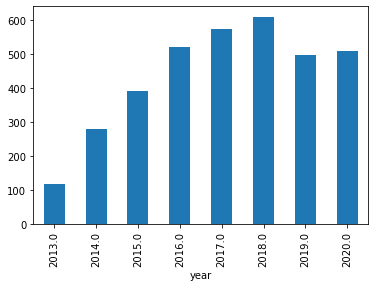

In [164]:
# we slice our dataset into new one with only play station 4 titles
ps4_slice = games.loc[(games['PlayStation 4'] == 1)]
# we groupby year and plot
play1 = ps4_slice.groupby(['year'])['PlayStation 4'].count()
play1.plot.bar()
None

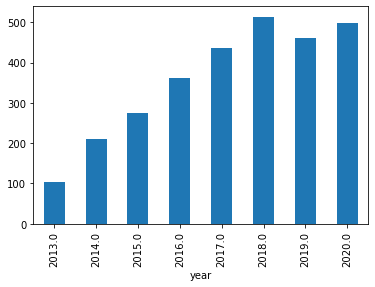

In [165]:
# we slice our dataset into new one with only xbox one titles
xbox_slice = games.loc[(games['Xbox One'] == 1)]
# we groupby year and plot
xbox_one = xbox_slice.groupby(['year'])['Xbox One'].count()
xbox_one.plot.bar()
None

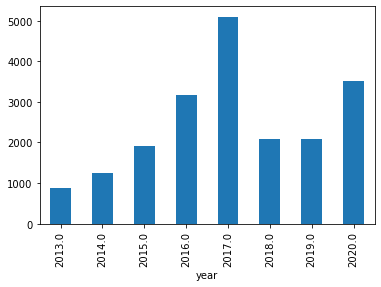

In [166]:
# we slice our dataset into new one with only pc titles
pc_slice = games.loc[(games['PC'] == 1)]
# we groupby year and plot
pc1 = pc_slice.groupby(['year'])['PC'].count()
pc1.plot.bar()
None

# 2. Do game ratings vary from year to year for each of these platforms?

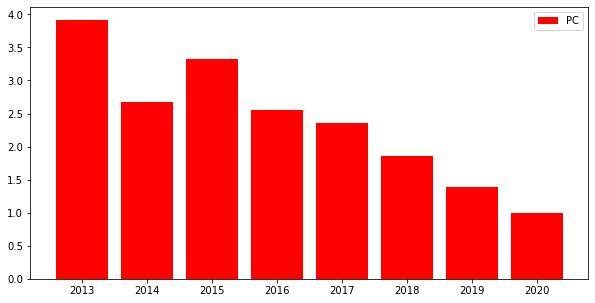

In [167]:
# we crate a new dataset only with pc games and only where we have ratings
df_pc = games[(games['PC'] == 1) & (games['rating'].notnull()) & (games['rating']!=0) & (games['rating_count'] > 10)].copy()
df_pc_min = df_pc["weighted_score"].min()
df_pc_max = df_pc["weighted_score"].max()
# now we create a normalized rating score to compare it more accurate
df_pc["normalized_weighted_score"] = (df_pc["weighted_score"] - df_pc_min) / (df_pc_max - df_pc_min) * 100

ratings_pc = df_pc[df_pc['normalized_weighted_score']!=0].groupby('year')['normalized_weighted_score'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_pc.keys(), ratings_pc.values, color='r', label='PC')
plt.legend()
plt.show()
None

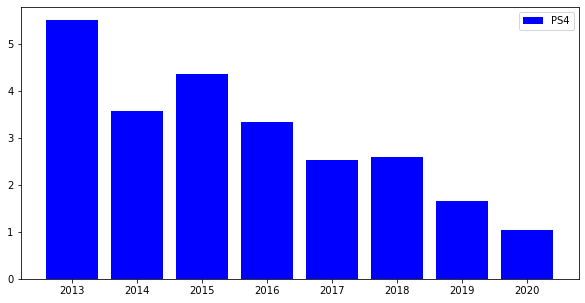

In [168]:
df_ps4 = games[(games['PlayStation 4'] == 1) & (games['rating'].notnull()) & (games['rating']!=0) & (games['rating_count'] > 10)].copy()
df_ps4_min = df_ps4["weighted_score"].min()
df_ps4_max = df_ps4["weighted_score"].max()
df_ps4["normalized_weighted_score"] = (df_ps4["weighted_score"] - df_ps4_min) / (df_ps4_max - df_ps4_min) * 100

plt.subplots(figsize=(10,5))
ratings_ps4 = df_ps4.groupby('year')['normalized_weighted_score'].mean()
plt.bar(ratings_ps4.keys(), ratings_ps4.values, color='b', label='PS4')
plt.legend()
plt.show()
None

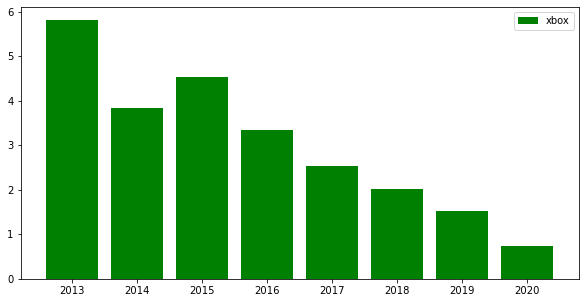

In [169]:
df_xbox = games[(games['Xbox One'] == 1) & (games['rating'].notnull()) & (games['rating']!=0) & (games['rating_count'] > 10)].copy()
df_xbox_min = df_xbox["weighted_score"].min()
df_xbox_max = df_xbox["weighted_score"].max()
df_xbox["normalized_weighted_score"] = (df_xbox["weighted_score"] - df_xbox_min) / (df_xbox_max - df_xbox_min) * 100

plt.subplots(figsize=(10,5))
ratings_xbox = df_xbox.groupby('year')['normalized_weighted_score'].mean()
plt.bar(ratings_xbox.keys(), ratings_xbox.values, color='g', label='xbox')
plt.legend()
plt.show()
None

### Insights
we see that number of reviews is dropping over time, with the minimum to reach at the end of the consoles life cycle. It is expected the reviews to rise with the introduction of the next xbox and PS consoles!

# 3. Which perspective is the most common for games that are published to all three platforms?

In [190]:
# we will use this function to compare perspective and find the most popular
def sort_two_lists(lst1, lst2):
    genres_groupped = list(zip(lst1, lst2))
    genres_groupped.sort()

    counts_sorted = []
    genres_sorted = []

    for i in genres_groupped:
        counts_sorted += [i[0]]
        genres_sorted += [i[1]]
    return genres_sorted, counts_sorted

In [183]:
# Convert the player perspectives column
games['player_perspectives'] = list(map(conv_to_list, games['player_perspectives']))
games['player_perspectives'] = list(map(lambda x: convert_from(x, perspectives), games['player_perspectives']))
games.head(1)

C:\Users\stama\AppData\Local\Temp/ipykernel_7308/1061981273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['player_perspectives'] = list(map(conv_to_list, games['player_perspectives']))
C:\Users\stama\AppData\Local\Temp/ipykernel_7308/1061981273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['player_perspectives'] = list(map(lambda x: convert_from(x, perspectives), games['player_perspectives']))


,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","[First person, Third person]",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0,1,1,1


In [187]:
'''
Keep a new df named df_platforms. This will have only cases in which PS4, XBoxOne and PC are equal to 1. 
Because we want to see perpectives across all 3 platforms
'''
df_platforms = games[(games['PlayStation 4'] == 1) & (games['Xbox One'] == 1) & (games['PC'] == 1)].copy()
df_platforms.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","[First person, Third person]",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000,1,1,1
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",[Third person],95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780,1,1,1
34,7599.0,LifeisStrange,"[Linux, PC, PlayStation 3, Xbox 360, Mac, Andr...",2015-01-30,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Science fiction, Drama]",[Third person],83.634248,1068.0,"1342,1906,2993,3042,3188,9727,11233,11270,19441",81.236043,1078.0,https://www.igdb.com/games/life-is-strange,78.837838,10.0,2015.0,1.0,89321.376402,35.266908,1,1,1
35,7351.0,DOOM,"[PC, PlayStation 4, Xbox One]",2016-05-13,Main Game,[Shooter],"[Action, Science fiction, Horror, Survival]",[First person],86.189907,1026.0,"312,533,571,1006,2031,9498,9727,11118,19531",86.579328,1060.0,https://www.igdb.com/games/doom--2,86.968750,34.0,2016.0,5.0,88430.844465,34.915298,1,1,1
42,25076.0,RedDeadRedemption2,"[PC, PlayStation 4, Xbox One]",2018-10-26,Main Game,"[Shooter, Role-playing (RPG), Adventure]","[Action, Open world]",[Third person],91.919038,917.0,"17379,19564,26192,28168,55038,80916,81249,1050...",92.988931,944.0,https://www.igdb.com/games/red-dead-redemption-2,94.058824,27.0,2018.0,10.0,84289.758094,33.280266,1,1,1


In [188]:
for perspective in perspectives.values():
    df_platforms[perspective] = list(map(lambda x: check_string(x, perspective), df_platforms['player_perspectives']))

df_platforms.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,First person,Third person,Bird view,Side view,Text,Auditory,Virtual Reality
0,1020.0,GrandTheftAutoV,"[PC, PlayStation 3, Xbox 360, PlayStation 4, X...",2013-09-17,Main Game,"[Shooter, Racing, Sport, Adventure]","[Action, Comedy, Sandbox, Open world]","[First person, Third person]",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000,1,1,1,1,1,0,0,0,0,0
1,1942.0,TheWitcher3:WildHunt,"[PC, PlayStation 4, Xbox One]",2015-05-19,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]",[Third person],95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780,1,1,1,0,1,0,0,0,0,0
34,7599.0,LifeisStrange,"[Linux, PC, PlayStation 3, Xbox 360, Mac, Andr...",2015-01-30,Main Game,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Science fiction, Drama]",[Third person],83.634248,1068.0,"1342,1906,2993,3042,3188,9727,11233,11270,19441",81.236043,1078.0,https://www.igdb.com/games/life-is-strange,78.837838,10.0,2015.0,1.0,89321.376402,35.266908,1,1,1,0,1,0,0,0,0,0
35,7351.0,DOOM,"[PC, PlayStation 4, Xbox One]",2016-05-13,Main Game,[Shooter],"[Action, Science fiction, Horror, Survival]",[First person],86.189907,1026.0,"312,533,571,1006,2031,9498,9727,11118,19531",86.579328,1060.0,https://www.igdb.com/games/doom--2,86.968750,34.0,2016.0,5.0,88430.844465,34.915298,1,1,1,1,0,0,0,0,0,0
42,25076.0,RedDeadRedemption2,"[PC, PlayStation 4, Xbox One]",2018-10-26,Main Game,"[Shooter, Role-playing (RPG), Adventure]","[Action, Open world]",[Third person],91.919038,917.0,"17379,19564,26192,28168,55038,80916,81249,1050...",92.988931,944.0,https://www.igdb.com/games/red-dead-redemption-2,94.058824,27.0,2018.0,10.0,84289.758094,33.280266,1,1,1,0,1,0,0,0,0,0


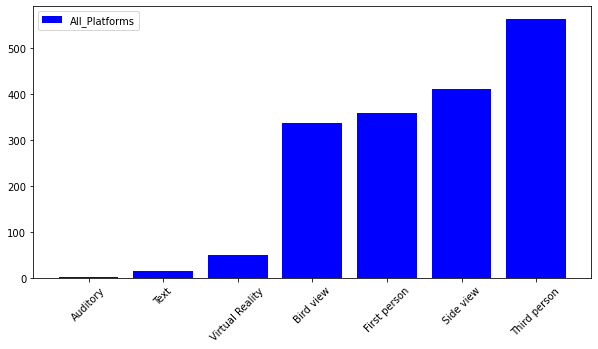

In [189]:
lst = []
for perspective in perspectives.values():
    lst.append(len(df_platforms[df_platforms[perspective]==1]))

perspectives_sorted, counts_sorted = sort_two_lists(lst, perspectives.values())
    
plt.subplots(figsize=(10,5))
plt.bar(perspectives_sorted, counts_sorted, color='b', label='All_Platforms')
plt.xticks(rotation=45)

plt.legend()
plt.show()
None